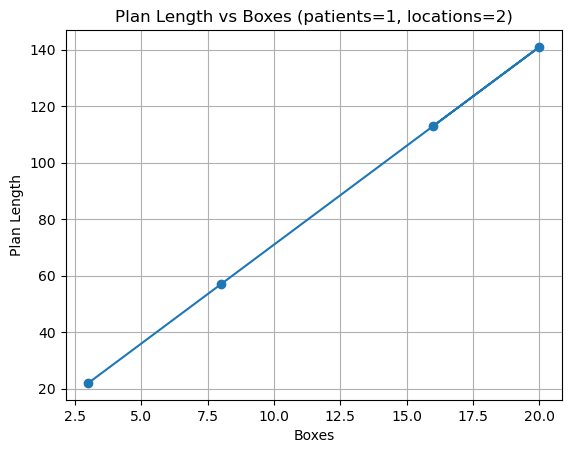

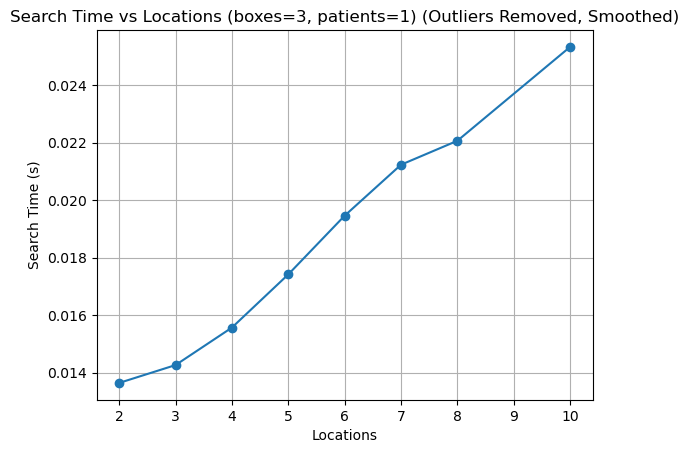

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv('scaling_results_downward.csv')

# Clean up: convert 'Na' and empty strings to NaN, and numeric columns to float
df = df.replace(['Na', '', 'nan'], pd.NA)
for col in ['plan_length', 'expanded', 'evaluated', 'generated', 'search_time']:
    df[col] = pd.to_numeric(df[col], errors='coerce')


# Example 1: Plot plan_length vs boxes (for fixed patients and locations)
subset = df[(df['patients'] == 1) & (df['locations'] == 2)]
plt.figure()
plt.plot(subset['boxes'], subset['plan_length'], marker='o')
plt.xlabel('Boxes')
plt.ylabel('Plan Length')
plt.title('Plan Length vs Boxes (patients=1, locations=2)')
plt.grid(True)
plt.savefig('dw_plan_length_vs_boxes.png')


# Example 3: Plot search_time vs locations (for fixed boxes and patients), ignoring outliers and smoothing the line
subset = df[(df['boxes'] == 3) & (df['patients'] == 1)]

# Remove outliers using IQR method
q1 = subset['search_time'].quantile(0.25)
q3 = subset['search_time'].quantile(0.75)
iqr = q3 - q1
filtered = subset[(subset['search_time'] >= q1 - 1.5 * iqr) & (subset['search_time'] <= q3 + 1.5 * iqr)]

# Sort by increasing locations
filtered = filtered.sort_values('locations')

# Smooth the line using a rolling mean
smoothed = filtered['search_time'].rolling(window=2, min_periods=1, center=True).mean()

plt.figure()
plt.plot(filtered['locations'], smoothed, marker='o')
plt.xlabel('Locations')
plt.ylabel('Search Time (s)')
plt.title('Search Time vs Locations (boxes=3, patients=1) (Outliers Removed, Smoothed)')
plt.grid(True)
plt.savefig('dw_search_time_vs_locations_no_outliers_smoothed.png')

plt.show()

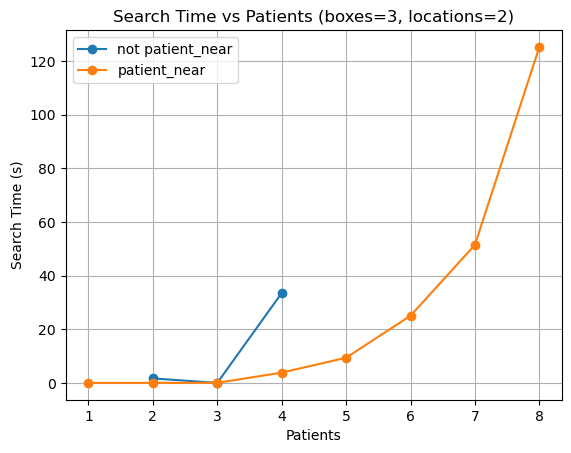

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv('scaling_results_downward.csv')

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Clean up: convert 'Na' and empty strings to NaN, and numeric columns to float
df = df.replace(['Na', '', 'nan'], pd.NA)
for col in ['plan_length', 'expanded', 'evaluated', 'generated', 'search_time']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Ensure 'patient_near' is boolean
df['patient_near'] = df['patient_near'].astype(str).str.strip().map({'True': True, 'False': False})

# Plot search_time vs patients (for fixed boxes and locations), differentiate by patient_near
subset = df[(df['boxes'] == 3) & (df['locations'] == 2)]

plt.figure()
for near_value, group in subset.groupby('patient_near'):
    label = 'patient_near' if near_value else 'not patient_near'
    plt.plot(group['patients'], group['search_time'], marker='o', label=label)

plt.xlabel('Patients')
plt.ylabel('Search Time (s)')
plt.title('Search Time vs Patients (boxes=3, locations=2)')
plt.legend()
plt.grid(True)
plt.savefig('dw_search_time_vs_patients_near.png')
plt.show()

In [35]:
df_ff

,problem,plan_length,search_depth,num_states,time,num_facts,num_actions,patient_near,num_boxes,num_patients,num_units,num_locations
0,pb_16box1patient3units2loc,98,7.0,36665.0,1.01,355.0,754.0,False,16,1,3,2
1,pb_20box1patient3units2loc,98,7.0,104441.0,5.07,477.0,1098.0,False,20,1,3,2
2,pb_8box1patient3units2loc,56,7.0,1773.0,0.04,159.0,258.0,False,8,1,3,2
3,pb_3box1patient3units10loc,55,13.0,165.0,0.03,73.0,92.0,False,3,1,3,10
4,pb_3box1patient3units3loc,27,6.0,105.0,0.03,59.0,64.0,False,3,1,3,3
5,pb_3box1patient3units4loc,31,7.0,108.0,0.03,61.0,68.0,False,3,1,3,4
6,pb_3box1patient3units5loc,35,8.0,116.0,0.02,63.0,72.0,False,3,1,3,5
7,pb_3box1patient3units6loc,39,9.0,120.0,0.03,65.0,76.0,False,3,1,3,6
8,pb_3box1patient3units7loc,43,10.0,135.0,0.02,67.0,80.0,False,3,1,3,7
9,pb_3box1patient3units8loc,47,11.0,139.0,0.02,69.0,84.0,False,3,1,3,8


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Load the CSV
df_ff = pd.read_csv('scaling_results_ff.csv')

# Add 'patient_near' column: True if 'patient_near' in problem name, else False
df_ff['patient_near'] = np.where(df_ff['problem'].str.contains('patient_near'), True, False)
df_ff.to_csv('scaling_results_ff_with_patient_near.csv', index=False)

# Add columns for number of boxes, patients, units, and locations
df_ff['num_boxes'] = df_ff['problem'].str.extract(r'(\d+)box').astype(int)
df_ff['num_patients'] = df_ff['problem'].str.extract(r'(\d+)patient').astype(int)
df_ff['num_units'] = df_ff['problem'].str.extract(r'(\d+)units').astype(int)
df_ff['num_locations'] = df_ff['problem'].str.extract(r'(\d+)loc').astype(int)


def smooth_and_plot(x, y, label, color, marker):
    # Remove NaNs
    mask = (~pd.isna(x)) & (~pd.isna(y))
    x = x[mask]
    y = y[mask]
    # Remove outliers using z-score
    if len(y) > 2:
        z = zscore(y)
        inliers = abs(z) < 1.8
        x = x[inliers]
        y = y[inliers]
    # Sort for line plot
    order = x.argsort()
    x = x.iloc[order]
    y = y.iloc[order]
    plt.plot(x, y, marker=marker, color=color, label=label)

df_ff.head()

,problem,plan_length,search_depth,num_states,time,num_facts,num_actions,patient_near,num_boxes,num_patients,num_units,num_locations
0,pb_16box1patient3units2loc,98,7.0,36665.0,1.01,355.0,754.0,False,16,1,3,2
1,pb_20box1patient3units2loc,98,7.0,104441.0,5.07,477.0,1098.0,False,20,1,3,2
2,pb_8box1patient3units2loc,56,7.0,1773.0,0.04,159.0,258.0,False,8,1,3,2
3,pb_3box1patient3units10loc,55,13.0,165.0,0.03,73.0,92.0,False,3,1,3,10
4,pb_3box1patient3units3loc,27,6.0,105.0,0.03,59.0,64.0,False,3,1,3,3


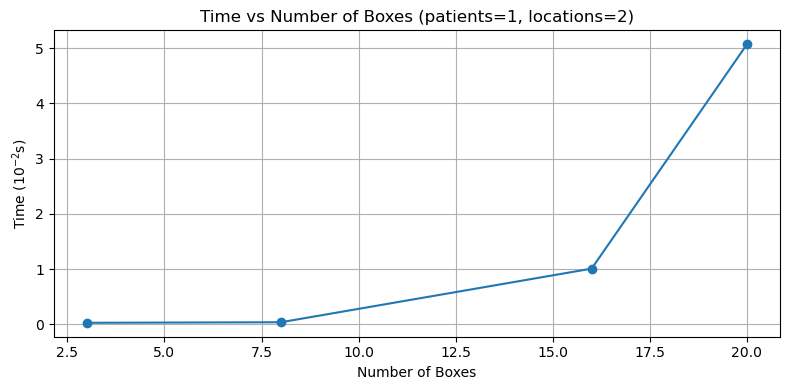

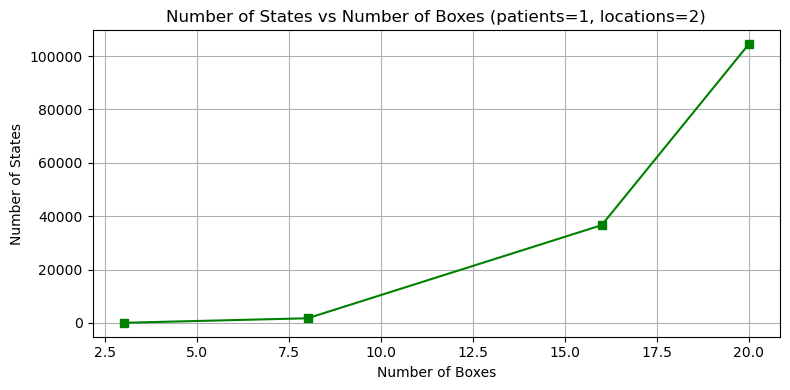

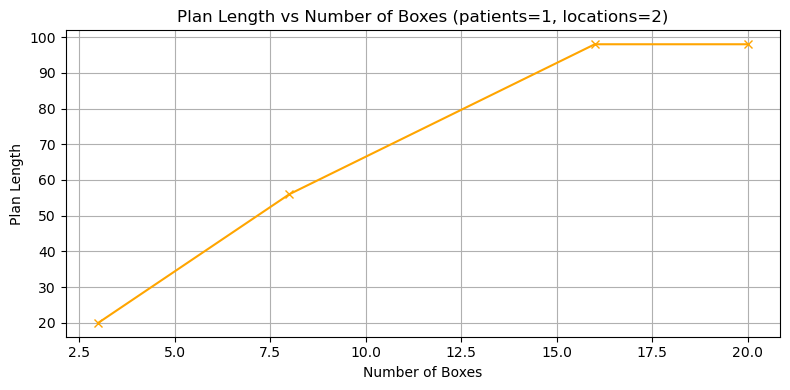

In [37]:
# Add `savefig` to each plot to save images as PNG files

filtered = df_ff[(df_ff['num_patients'] == 1) & (df_ff['num_locations'] == 2)].sort_values('num_boxes')

# Plot time vs. num_boxes
plt.figure(figsize=(8, 4))
plt.plot(filtered['num_boxes'], filtered['time'], marker='o')
plt.xlabel('Number of Boxes')
plt.ylabel('Time ($10^{-2}$s)')
plt.title('Time vs Number of Boxes (patients=1, locations=2)')
plt.grid(True)
plt.tight_layout()
plt.savefig('ff_time_vs_num_boxes.png')
plt.show()

# Plot num_states vs. num_boxes
plt.figure(figsize=(8, 4))
smooth_and_plot(filtered['num_boxes'], filtered['num_states'], 'Num States', 'green', 's')
plt.xlabel('Number of Boxes')
plt.ylabel('Number of States')
plt.title('Number of States vs Number of Boxes (patients=1, locations=2)')
plt.grid(True)
plt.tight_layout()
plt.savefig('ff_num_states_vs_num_boxes.png')
plt.show()

# Plot plan_length vs. num_boxes
plt.figure(figsize=(8, 4))
smooth_and_plot(filtered['num_boxes'], filtered['plan_length'], 'Plan Length', 'orange', 'x')
plt.xlabel('Number of Boxes')
plt.ylabel('Plan Length')
plt.title('Plan Length vs Number of Boxes (patients=1, locations=2)')
plt.grid(True)
plt.tight_layout()
plt.savefig('ff_plan_length_vs_num_boxes.png')
plt.show()

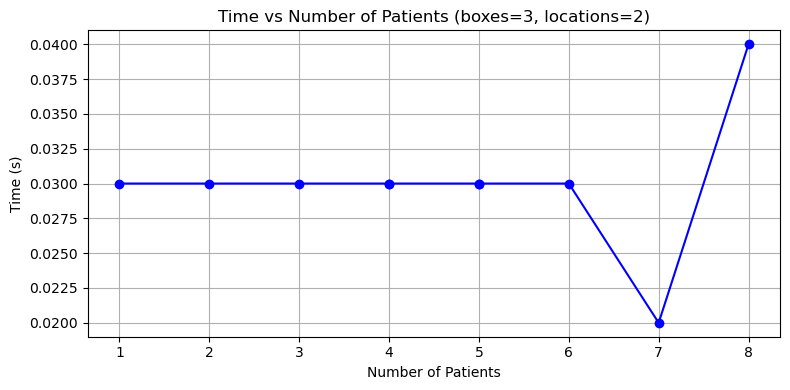

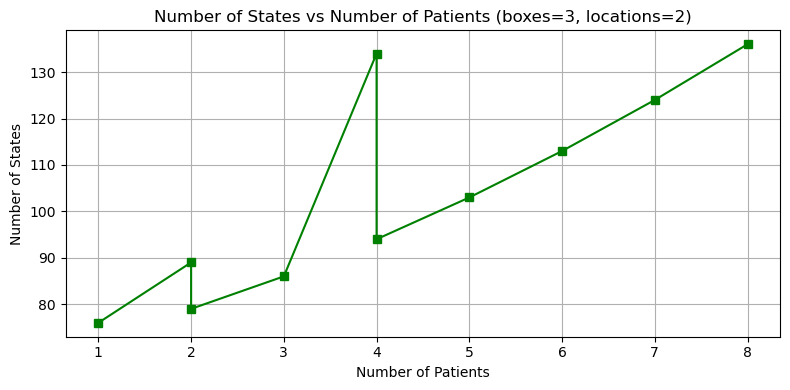

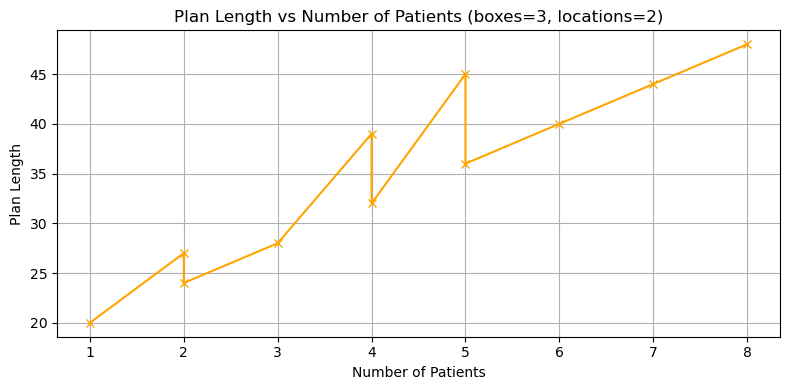

In [ ]:
filtered_pat = df_ff[(df_ff['num_locations'] == 2) & (df_ff['num_boxes'] == 3)]

# Filter for num_locations = 2 and num_boxes = 3 (vary patients), sort by increasing num_patients
filtered_pat = filtered_pat.sort_values('num_patients')

plt.figure(figsize=(8, 4))
smooth_and_plot(filtered_pat['num_patients'], filtered_pat['time'], 'Time (s)', 'blue', 'o')
plt.xlabel('Number of Patients')
plt.ylabel('Time (s)')
plt.title('Time vs Number of Patients (boxes=3, locations=2)')
plt.grid(True)
plt.tight_layout()
plt.savefig('ff_time_vs_num_patients.png')
plt.show()

plt.figure(figsize=(8, 4))
smooth_and_plot(filtered_pat['num_patients'], filtered_pat['num_states'], 'Num States', 'green', 's')
plt.xlabel('Number of Patients')
plt.ylabel('Number of States')
plt.title('Number of States vs Number of Patients (boxes=3, locations=2)')
plt.grid(True)
plt.tight_layout()
plt.savefig('ff_num_states_vs_num_patients.png')
plt.show()

plt.figure(figsize=(8, 4))
smooth_and_plot(filtered_pat['num_patients'], filtered_pat['plan_length'], 'Plan Length', 'orange', 'x')
plt.xlabel('Number of Patients')
plt.ylabel('Plan Length')
plt.title('Plan Length vs Number of Patients (boxes=3, locations=2)')
plt.grid(True)
plt.tight_layout()
plt.savefig('ff_plan_length_vs_num_patients.png')
plt.show()


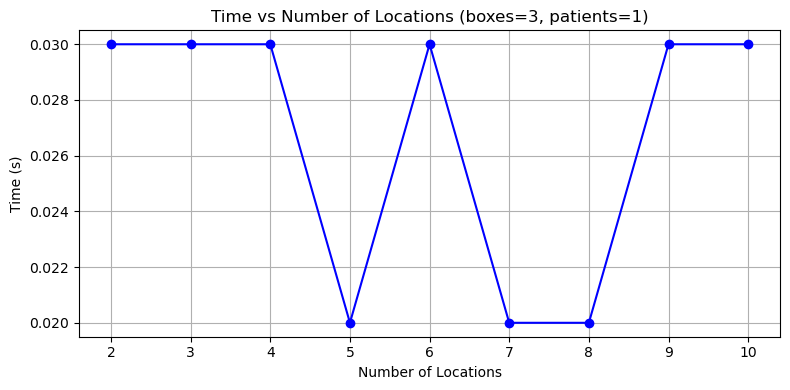

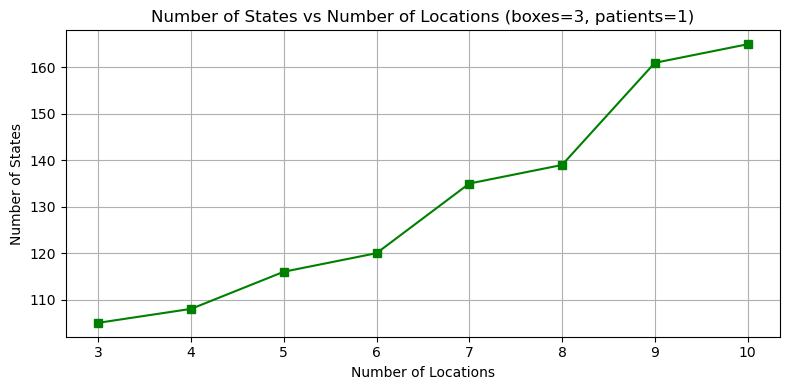

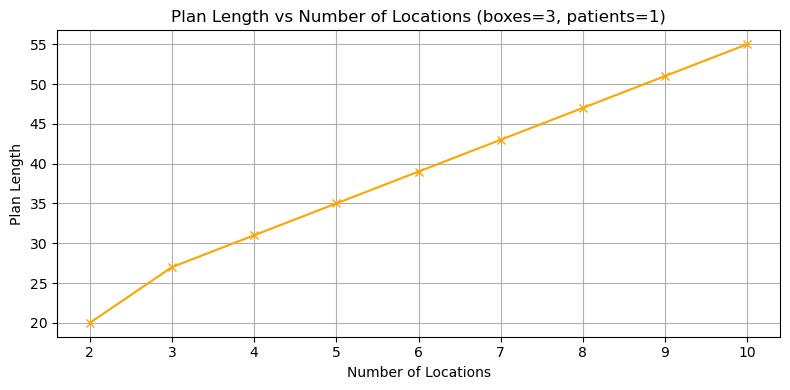

In [39]:
filtered_loc = df_ff[(df_ff['num_patients'] == 1) & (df_ff['num_boxes'] == 3)].sort_values('num_locations')

# Filter for num_patients = 1 and num_boxes = 3 (vary locations)
filtered_loc = filtered_loc.sort_values('num_locations')

plt.figure(figsize=(8, 4))
smooth_and_plot(filtered_loc['num_locations'], filtered_loc['time'], 'Time (s)', 'blue', 'o')
plt.xlabel('Number of Locations')
plt.ylabel('Time (s)')
plt.title('Time vs Number of Locations (boxes=3, patients=1)')
plt.grid(True)
plt.tight_layout()
plt.savefig('ff_time_vs_num_locations.png')
plt.show()

plt.figure(figsize=(8, 4))
smooth_and_plot(filtered_loc['num_locations'], filtered_loc['num_states'], 'Num States', 'green', 's')
plt.xlabel('Number of Locations')
plt.ylabel('Number of States')
plt.title('Number of States vs Number of Locations (boxes=3, patients=1)')
plt.grid(True)
plt.tight_layout()
plt.savefig('ff_num_states_vs_num_locations.png')
plt.show()

plt.figure(figsize=(8, 4))
smooth_and_plot(filtered_loc['num_locations'], filtered_loc['plan_length'], 'Plan Length', 'orange', 'x')
plt.xlabel('Number of Locations')
plt.ylabel('Plan Length')
plt.title('Plan Length vs Number of Locations (boxes=3, patients=1)')
plt.grid(True)
plt.tight_layout()
plt.savefig('ff_plan_length_vs_num_locations.png')
plt.show()